**Section 6B** <br>
2/11/25

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import logm
from scipy.integrate import solve_ivp

# Task 1: Poisson

n = number of stars per unit volume evenely distributed around us <br>
N = $n*\frac{4}{3}\pi R^3$, number of stars within radius R

To find the probability for the nearest star being at a distance R, multiply the probability that there is no star within R and the probability that there is a star at R (between R+dR). 
$$P(R) = 4\pi R^2 n e^{-\frac{4}{3}\pi n R^3}$$

# Task 2: Lorentzian

Equation of motion for damped, driven harmonic oscillator:
$$\frac{\mathrm{d}^2 x}{\mathrm{d}t^2} + \gamma \frac{\mathrm{d} x}{\mathrm{d}t} + \omega_0^2 x = F e^{i\omega_f t}$$

$$\tilde{x}(\omega) = \frac{F \delta(\omega - \omega_f)}{\omega_0^2 - \omega^2 + i \gamma \omega}$$

Energy absorbed per cycle: 
$$E = \frac{1}{T} \int_{0}^{T} F \dot{x} dt$$

Energy absorption follows a Lorentzian: 
$$E = F \pi \frac{\gamma \omega_f}{(\omega_0^2 - \omega_f^2)^2 + \gamma^2\omega_f^2}$$

# Task 3: Revisit Heisenberg XXX Hamiltonian on a Ring: Markov Chain

**Question 1: Markov chain in site basis**

Transition matrix P is an 8x8 matrix where each entry $P_{ij}$ represents the probability of transitioning from state i to state j. 

The N=3 states are defined as: <br>
1. ∣↑↑↑⟩
2. ∣↑↑↓⟩
3. ∣↑↓↑⟩
4. ∣↑↓↓⟩
5. ∣↓↑↑⟩
6. ∣↓↑↓⟩
7. ∣↓↓↑⟩
8. ∣↓↓↓⟩

In [3]:
# Define the transition probability matrix
P = np.array([
    [1, 1/3, 1/3, 0, 1/3, 0, 0, 0],
    [1/3, 1, 0, 1/3, 0, 1/3, 0, 0],
    [1/3, 0, 1, 1/3, 0, 0, 1/3, 0],
    [0, 1/3, 1/3, 1, 0, 0, 0, 1/3],
    [1/3, 0, 0, 0, 1, 1/3, 1/3, 0],
    [0, 1/3, 0, 0, 1/3, 1, 0, 1/3],
    [0, 0, 1/3, 0, 1/3, 0, 1, 1/3],
    [0, 0, 0, 1/3, 0, 1/3, 1/3, 1]
])

**Question 2**

A stationary distribution $\pi$ satisfies $\pi P = \pi$, meaning a transition will keep it in the same steady state. The normalization condition is  
$$\sum_{i=1}^{8}\pi_i = 1$$

In [4]:
# Normalize each row to ensure they sum to 1
P = P / P.sum(axis=1, keepdims=True)

# Solve for the stationary distribution
n = P.shape[0]
A = P.T - np.eye(n)
A[-1, :] = 1  # Replace last row to enforce sum(π) = 1
b = np.zeros(n)
b[-1] = 1

# Solve the linear system πP = π
pi = np.linalg.lstsq(A, b, rcond=None)[0]

# Display the normalized transition probability matrix
print("Normalized Transition Probability Matrix P:")
print(P)

# Display the stationary distribution
print("Stationary Distribution π:")
print(pi)

Normalized Transition Probability Matrix P:
[[0.5        0.16666667 0.16666667 0.         0.16666667 0.
  0.         0.        ]
 [0.16666667 0.5        0.         0.16666667 0.         0.16666667
  0.         0.        ]
 [0.16666667 0.         0.5        0.16666667 0.         0.
  0.16666667 0.        ]
 [0.         0.16666667 0.16666667 0.5        0.         0.
  0.         0.16666667]
 [0.16666667 0.         0.         0.         0.5        0.16666667
  0.16666667 0.        ]
 [0.         0.16666667 0.         0.         0.16666667 0.5
  0.         0.16666667]
 [0.         0.         0.16666667 0.         0.16666667 0.
  0.5        0.16666667]
 [0.         0.         0.         0.16666667 0.         0.16666667
  0.16666667 0.5       ]]
Stationary Distribution π:
[0.125 0.125 0.125 0.125 0.125 0.125 0.125 0.125]


**Question 3**

In [ ]:
# First case initial guess

# Normalize each row to ensure they sum to 1
P = P / P.sum(axis=1, keepdims=True)

# Power iteration to find the stationary distribution
pi = np.zeros(8)
pi[0] = 1  # Initial guess: Pr(|↑↑↑⟩) = 1

epsilon = 1e-8  # Convergence threshold
max_iters = 1000  # Maximum iterations
for _ in range(max_iters):
    pi_next = pi @ P
    if np.linalg.norm(pi_next - pi) < epsilon:
        break
    pi = pi_next

# Display the normalized transition probability matrix
print("Normalized Transition Probability Matrix P:")
print(P)

# Display the stationary distribution
print("Stationary Distribution π (Power Iteration):")
print(pi)

Normalized Transition Probability Matrix P:
[[0.5        0.16666667 0.16666667 0.         0.16666667 0.
  0.         0.        ]
 [0.16666667 0.5        0.         0.16666667 0.         0.16666667
  0.         0.        ]
 [0.16666667 0.         0.5        0.16666667 0.         0.
  0.16666667 0.        ]
 [0.         0.16666667 0.16666667 0.5        0.         0.
  0.         0.16666667]
 [0.16666667 0.         0.         0.         0.5        0.16666667
  0.16666667 0.        ]
 [0.         0.16666667 0.         0.         0.16666667 0.5
  0.         0.16666667]
 [0.         0.         0.16666667 0.         0.16666667 0.
  0.5        0.16666667]
 [0.         0.         0.         0.16666667 0.         0.16666667
  0.16666667 0.5       ]]
Stationary Distribution π (Power Iteration):
[0.12500002 0.12500001 0.12500001 0.12499999 0.12500001 0.12499999
 0.12499999 0.12499998]


In [6]:
# Second case initial guess

# Power iteration to find the stationary distribution
pi = np.zeros(8)
pi[0] = 1/2  # Initial guess: Pr(|↑↑↑⟩) = 1/2
pi[5] = 1/2

epsilon = 1e-8  # Convergence threshold
max_iters = 1000  # Maximum iterations
for _ in range(max_iters):
    pi_next = pi @ P
    if np.linalg.norm(pi_next - pi) < epsilon:
        break
    pi = pi_next

# Display the stationary distribution
print("Stationary Distribution π (Power Iteration):")
print(pi)

Stationary Distribution π (Power Iteration):
[0.12500001 0.12500001 0.12499999 0.12499999 0.12500001 0.12500001
 0.12499999 0.12499999]


**Question 4: Markov chain in magnon basis**

Magnon Energies: [-2.  1.  1.]
Transition Matrix:
 [[0.         0.5        0.5       ]
 [0.95257413 0.         0.04742587]
 [0.95257413 0.04742587 0.        ]]


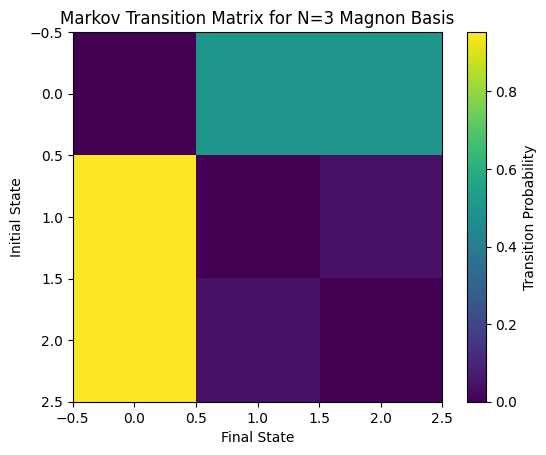

In [3]:
def compute_magnon_energies(N):
    """Compute magnon energies for given N using E_k = -2J * cos(2πk/N)."""
    J = 1  # Assume J = 1 for simplicity
    k_values = np.arange(N)
    energies = -2 * J * np.cos(2 * np.pi * k_values / N)
    return energies

def construct_transition_matrix(energies, T, kB=1.0):
    """Construct the Markov transition matrix P using Boltzmann factors."""
    N = len(energies)
    P = np.zeros((N, N))

    for i in range(N):
        for j in range(N):
            if i != j:
                P[i, j] = np.exp(-(energies[j] - energies[i]) / (kB * T))

    # Normalize each row to ensure it's a valid transition matrix
    P /= P.sum(axis=1, keepdims=True)

    return P

def plot_transition_matrix(P):
    """Plot the transition matrix as a heatmap."""
    plt.imshow(P, cmap='viridis', interpolation='nearest')
    plt.colorbar(label='Transition Probability')
    plt.xlabel("Final State")
    plt.ylabel("Initial State")
    plt.title("Markov Transition Matrix for N=3 Magnon Basis")
    plt.show()

# Parameters
N = 3
T = 1.0  # Set temperature for Boltzmann factor

# Compute energies and construct transition matrix
energies = compute_magnon_energies(N)
P = construct_transition_matrix(energies, T)

# Display results
print("Magnon Energies:", energies)
print("Transition Matrix:\n", P)

# Plot the transition matrix
plot_transition_matrix(P)

**Question 5**

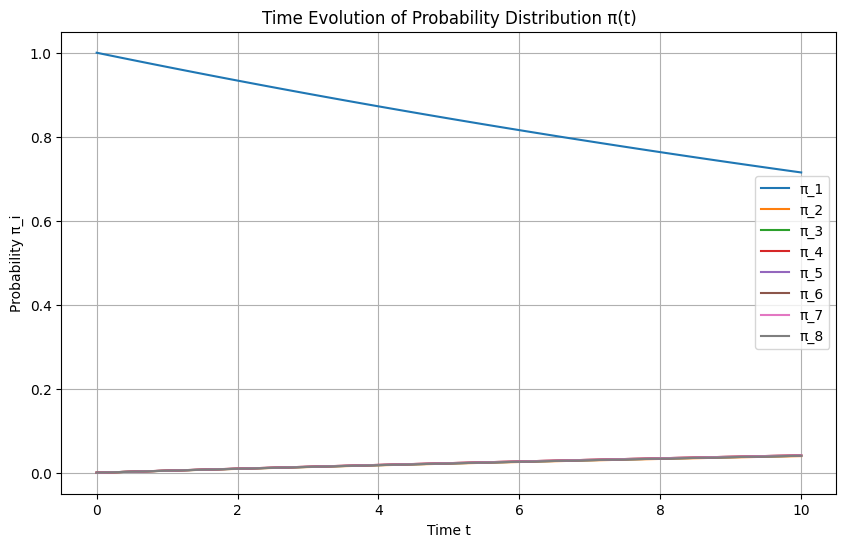

Stationary distribution π: [0.125 0.125 0.125 0.125 0.125 0.125 0.125 0.125]
Sum of π: 1.0


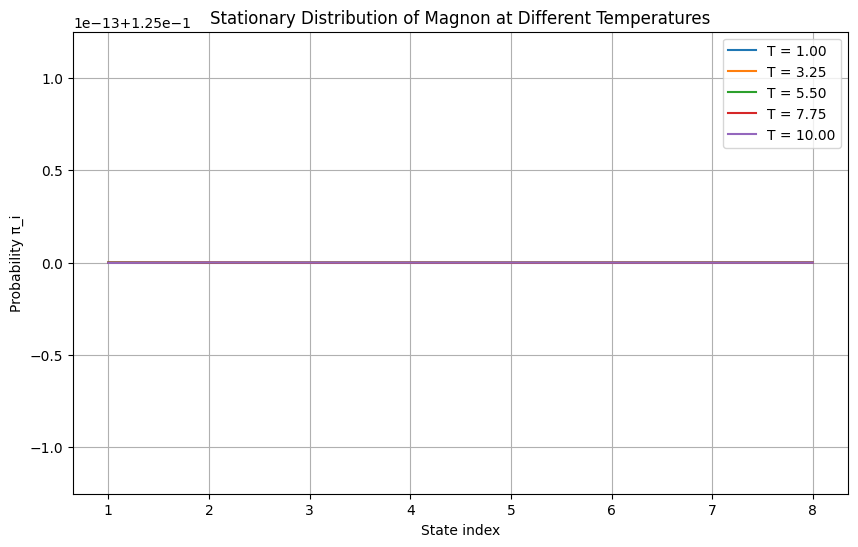

In [13]:
# Transition matrix P
P = np.array([
    [1, 1/3, 1/3, 0, 1/3, 0, 0, 0],
    [1/3, 1, 0, 1/3, 0, 1/3, 0, 0],
    [1/3, 0, 1, 1/3, 0, 0, 1/3, 0],
    [0, 1/3, 1/3, 1, 0, 0, 0, 1/3],
    [1/3, 0, 0, 0, 1, 1/3, 1/3, 0],
    [0, 1/3, 0, 0, 1/3, 1, 0, 1/3],
    [0, 0, 1/3, 0, 1/3, 0, 1, 1/3],
    [0, 0, 0, 1/3, 0, 1/3, 1/3, 1]
])
P = P / P.sum(axis=1, keepdims=True)

# Compute the transition rate matrix Q
n = 1000
delta_t = 1.0
Pn = np.linalg.matrix_power(P, n)
Q = (1 / (n * delta_t)) * logm(Pn)

# Define the master equation
def master_equation(t, pi):
    return pi @ Q

# Initial condition: Pr(|k = 1⟩) = 1
initial_pi = np.array([1, 0, 0, 0, 0, 0, 0, 0])

# Solve the system numerically
t_span = (0, 10)
t_eval = np.linspace(0, 10, 100)
solution = solve_ivp(master_equation, t_span, initial_pi, t_eval=t_eval, method='RK45')

# Plot the results
plt.figure(figsize=(10, 6))
for i in range(solution.y.shape[0]):
    plt.plot(solution.t, solution.y[i], label=f'π_{i+1}')
plt.xlabel('Time t')
plt.ylabel('Probability π_i')
plt.title('Time Evolution of Probability Distribution π(t)')
plt.legend()
plt.grid(True)
plt.show()

# Find stationary distribution π satisfying πP = π
def find_stationary_distribution(P):
    eigvals, eigvecs = np.linalg.eig(P.T)
    stationary_dist = np.real(eigvecs[:, np.isclose(eigvals, 1)])
    stationary_dist = stationary_dist[:, 0]
    stationary_dist = stationary_dist / stationary_dist.sum()
    return stationary_dist

stationary_dist = find_stationary_distribution(P)
print("Stationary distribution π:", stationary_dist)
print("Sum of π:", np.sum(stationary_dist))

# Analyze changes with temperature
temperatures = np.linspace(1, 10, 5)
stationary_distributions = []
for T in temperatures:
    P_temp = np.exp(-P / T)
    P_temp = P_temp / P_temp.sum(axis=1, keepdims=True)
    stationary_distributions.append(find_stationary_distribution(P_temp))

# Plot stationary distributions at different temperatures
plt.figure(figsize=(10, 6))
for i, dist in enumerate(stationary_distributions):
    plt.plot(range(1, 9), dist, label=f'T = {temperatures[i]:.2f}')
plt.xlabel('State index')
plt.ylabel('Probability π_i')
plt.title('Stationary Distribution of Magnon at Different Temperatures')
plt.legend()
plt.grid(True)
plt.show()

**Question 6**

In [11]:
P = np.array([
    [1, 1/3, 1/3, 0, 1/3, 0, 0, 0],
    [1/3, 1, 0, 1/3, 0, 1/3, 0, 0],
    [1/3, 0, 1, 1/3, 0, 0, 1/3, 0],
    [0, 1/3, 1/3, 1, 0, 0, 0, 1/3],
    [1/3, 0, 0, 0, 1, 1/3, 1/3, 0],
    [0, 1/3, 0, 0, 1/3, 1, 0, 1/3],
    [0, 0, 1/3, 0, 1/3, 0, 1, 1/3],
    [0, 0, 0, 1/3, 0, 1/3, 1/3, 1]
])
P = P / P.sum(axis=1, keepdims=True)

# Initial distributions
initial_guesses = [
    np.array([1, 0, 0, 0, 0, 0, 0, 0]),
    np.array([0.5, 0, 0, 0.5, 0, 0, 0, 0]),
    np.array([0.25, 0.25, 0.25, 0.25, 0, 0, 0, 0])
]

# Power iteration until convergence
def power_iteration(pi, P, tol=1e-6, max_iter=1000):
    for i in range(max_iter):
        next_pi = pi @ P
        if np.linalg.norm(next_pi - pi, 1) < tol:
            return next_pi
        pi = next_pi
    return pi

# Compute stationary distributions
for i, pi in enumerate(initial_guesses, start=1):
    stationary_dist = power_iteration(pi, P)
    print(f"Initial guess {i}: {stationary_dist}")

# Verify that each stationary distribution is valid
    print(f"Sum: {np.sum(stationary_dist):.6f}")
    print("--------------------------------")

Initial guess 1: [0.12500039 0.12500013 0.12500013 0.12499987 0.12500013 0.12499987
 0.12499987 0.12499961]
Sum: 1.000000
--------------------------------
Initial guess 2: [0.12500019 0.12500019 0.12500019 0.12500019 0.12499981 0.12499981
 0.12499981 0.12499981]
Sum: 1.000000
--------------------------------
Initial guess 3: [0.12500019 0.12500019 0.12500019 0.12500019 0.12499981 0.12499981
 0.12499981 0.12499981]
Sum: 1.000000
--------------------------------


**Question 7: Master equation evolution**

/usr/local/lib/python3.8/dist-packages/scipy/linalg/_matfuncs_inv_ssq.py:827: LogmExactlySingularWarning: The logm input matrix is exactly singular.
  warnings.warn(exact_singularity_msg, LogmExactlySingularWarning)


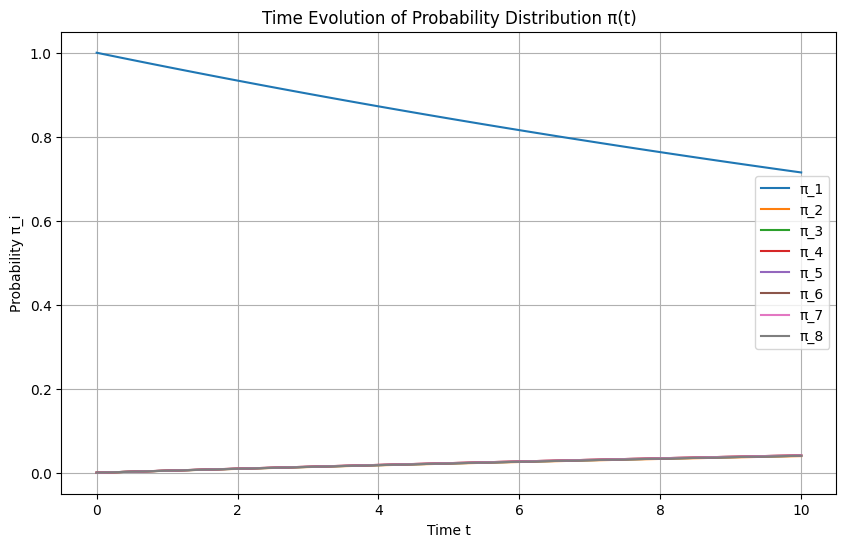

Initial guess 1: [0.12500039 0.12500013 0.12500013 0.12499987 0.12500013 0.12499987
 0.12499987 0.12499961]
Sum: 1.000000
--------------------------------
Initial guess 2: [0.12500008 0.12499997 0.12499997 0.12499997 0.12499997 0.12499997
 0.12499997 0.12500008]
Sum: 1.000000
--------------------------------
Initial guess 3: [0.125 0.125 0.125 0.125 0.125 0.125 0.125 0.125]
Sum: 1.000000
--------------------------------


In [8]:
# Compute the transition rate matrix Q
n = 1000
delta_t = 1.0
Pn = np.linalg.matrix_power(P, n)
Q = (1 / (n * delta_t)) * logm(Pn)

# Define the master equation
def master_equation(t, pi):
    return pi @ Q

# Initial condition: Pr(|k = 1⟩) = 1
initial_pi = np.array([1, 0, 0, 0, 0, 0, 0, 0])

# Solve the system numerically
t_span = (0, 10)
t_eval = np.linspace(0, 10, 100)
solution = solve_ivp(master_equation, t_span, initial_pi, t_eval=t_eval, method='RK45')

# Plot the results
plt.figure(figsize=(10, 6))
for i in range(solution.y.shape[0]):
    plt.plot(solution.t, solution.y[i], label=f'π_{i+1}')
plt.xlabel('Time t')
plt.ylabel('Probability π_i')
plt.title('Time Evolution of Probability Distribution π(t)')
plt.legend()
plt.grid(True)
plt.show()

# Compute stationary distributions
initial_guesses = [
    np.array([1, 0, 0, 0, 0, 0, 0, 0]),
    np.array([0.5, 0, 0, 0, 0, 0, 0, 0.5]),
    np.array([0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125])
]

def power_iteration(pi, P, tol=1e-6, max_iter=1000):
    for i in range(max_iter):
        next_pi = pi @ P
        if np.linalg.norm(next_pi - pi, 1) < tol:
            return next_pi
        pi = next_pi
    return pi

for i, pi in enumerate(initial_guesses, start=1):
    stationary_dist = power_iteration(pi, P)
    print(f"Initial guess {i}: {stationary_dist}")
    print(f"Sum: {np.sum(stationary_dist):.6f}")
    print("--------------------------------")